## Why NumPy?

- Compact, contiguous arrays of numbers in memory.
- Vectorized operations dispatch to optimized C/BLAS under the hood.
- Expressive APIs for indexing, broadcasting, and linear algebra.
- Foundation for scientific Python (Pandas, SciPy, scikit-learn).

### 1) Review- Creating arrays: 
- Build 1D/2D arrays using `array`, `linspace`, `arange`, and helpers (`zeros`, `ones`, `eye`).

In [1]:
# Add comments to all code in this Notebook
# You have seen this code before
import numpy as np

# 1D arrays
a = np.array([1, 3, 5, 7], dtype=float)
# 2 x 2 array with all integer elements
b = np.array([[1, 2, 3],
              [4, 5, 6]], dtype= int)
x_lin = np.linspace(0.0, 5.0, 11)     # inclusive ends
x_rng = np.arange(0.0, 5.0, 0.5)      # half-open [start, end)

print('a =\n', a)
print('b =\n', b)
print('lin    =', x_lin)
print('arange =', x_rng)

# 2D helpers
Z = np.zeros((2,3))
O = np.ones((3,2))
I = np.eye(3)
print('zeros:\n', Z)
print('ones:\n',  O)
print('eye:\n',   I)


a =
 [1. 3. 5. 7.]
b =
 [[1 2 3]
 [4 5 6]]
lin    = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
arange = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
ones:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
eye:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 2) Vectorization 
- Example: velocity of a falling object

velocity(1.0) = 9.8
t = [0 1 2 3 4]
v = [ 0.   9.8 19.6 29.4 39.2]


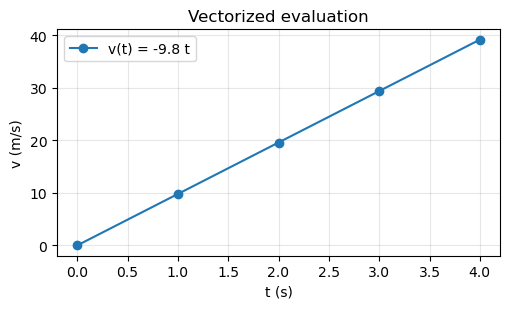

In [2]:
import numpy as np, matplotlib.pyplot as plt

def velocity(t):
    g = 9.8  # m/s^2
    v0 = 0.0
    return g * t + v0

# Scalar works
print('velocity(1.0) =', velocity(1.0))

# Vectorized with NumPy
t = np.array([0,1,2,3,4], dtype=int) # Vactorize t in an array 
v = velocity(t)
print('t =', t)
print('v =', v)

plt.figure(figsize=(5.2,3.2))
plt.plot(t, v, 'o-', label='v(t) = -9.8 t')
# plt.xlim(0, 4)
plt.xlabel('t (s)'); plt.ylabel('v (m/s)'); plt.title('Vectorized evaluation')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


#### Exercise
Calculate and plot the distance of a falling object with the same initial velocity above. 

In [ ]:
# Your code here


### 3) Indexing & slicing (1D and 2D)
- Use basic **indexing & slicing** (including 2D) and perform in-place assignments.

In [ ]:
import numpy as np

A = np.array([[7., 8., 9.],
              [4., 5., 6.]])
print('A=', A, '\nshape =', A.shape)

# Two equivalent ways to index a single element
print('A[1][2] =', A[1][2])
print('A[1,2]  =', A[1,2])

# Row / column slicing
print('Row 0  :', A[0, :])
print('Col 1  :', A[:, 1])

# In-place assignment
A[1, 2] = -A[0, 0]
print('After A[1,2] = -A[0,0]:', A)


#### Exercise
Make a 3 x 5 array using the function of your choice. 
Print out 1). a particular row, 2). a particular colum, and 3). a particular element

In [ ]:
# Your code here


### 4) Broadcasting: eliminating loops
- Apply **broadcasting** rules to eliminate loops and generate grids. It works by automatically expanding the smaller array across the larger one so that they have compatible shapes.

Examples below build a coordinate grid without explicit loops and compute a distance field.

In [ ]:
import numpy as np, matplotlib.pyplot as plt

x = np.linspace(-2, 2, num=10, dtype=float)[:, None]   # shape (10,1) column
y = np.linspace(-2, 2, 10, dtype= float)[None, :]   # shape (1,10) row
print(x)
print(y)
X = x + 0*y                             # broadcast to (10,10)
Y = 0*x + y                             # broadcast to (10,10)
R = np.sqrt(X**2 + Y**2)                # element-wise
# print(R)
plt.figure(figsize=(5,4))
plt.contourf(X, Y, R, levels=15, cmap='viridis')
plt.colorbar(label='radius')
plt.gca().set_aspect('equal', 'box')
plt.title('Broadcasted radius grid (no explicit loops)')
plt.xlabel('x'); plt.ylabel('y'); plt.tight_layout(); plt.show()


#### Exercise
Make up a function similar to the example above and plot it. 
Try increase the array sizes and see what heppens.

In [ ]:
# Your code here. 


### 5) Dtypes & precision: float32 vs float64
- Choose an appropriate **dtype** and understand precision trade-offs. 

In [ ]:
import numpy as np

# A tiny accumulation example
N = 1_000_000_000 # What does this line of code do?
x = np.ones(N, dtype=np.float32) / N
y = np.ones(N, dtype=np.float64) / N
print('sum float32 ≈', x.sum(), ' error=', abs(x.sum()-1.0))
print('sum float64 ≈', y.sum(), ' error=', abs(y.sum()-1.0))
# Run the code and explain what happens.
# Does it take a longer time (compare to other code) to run? Why or why not?

#### Exercise
Make two arrays using np.array. They have exactly the same elements but different precisions- one of them is float32 and the other one is float 64. Print out the difference of the (third items/1,000,000) in these two arrays. Should it be ZERO?? Why or whynot?

In [ ]:
# Your code here


### 6) Reshape & aggregations (axis)

In [ ]:
import numpy as np

B = np.arange(12).reshape(3,4) # What does this line of code do? Can you fix the error?
print('B=', B)
print('sum over rows (axis=1):', B.sum(axis=1)) # What does this line of code do?
print('mean over cols (axis=0):', B.mean(axis=0)) # What does this line of code does?


#### Exercise
Make another array and reshape it. Sum over each row and each colum of this array.

In [ ]:
# Your code here

### 7) Quick exercises to connect all the things we have learned so far

#### Exercise
Use NumPy array and matplotlib to plot y= x^3 - 2x. 

In [ ]:
# Your code here


#### Exercise
The dimensions of your arrays are undeclared initially. Use loops or recrusions to plot the function y= x^3 - 2x. You should get the same plot as above.
Hint: Start with a flowchart. You may use append. 

In [ ]:
# Your code here